## 一、原理介绍

面积图，又称区域图，可以看成是进行颜色填充后的折线图。这种图形不仅可以展示数据的波动和趋势，其围成的面积还可以直观地反映数据量的大小。面积图可分为两种，一般面积图和堆叠面积图。二者的差别如下：

* 一般面积图：图中所有的数据都按照实际值绘制，即从相同的零轴开始。
* 堆叠面积图：每一个变量的起点不同，依次在前一个变量的数值上进行叠加。图形的总面积表现为各个变量值的总量。通过比较不同颜色的面积块，可以得出不同的变量在数值上的差异，对应面积块越大的变量，其数值也越大。

下面是堆叠面积图的代码实现过程，数据来源于某上市企业2000年至2017年的资产负债率和营业收入增长率（已标准化），用于比较这两个指标的波动情况和数值差异。

## 二、代码实现

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #过滤掉警告的意思

In [2]:
data=pd.read_csv("F:/data/company2.csv",encoding='gbk')
data.head()

,证券简称,年份,资产负债率,营业收入增长率
0,珠江实业,2000,0.830264,0.223343
1,珠江实业,2001,0.835580,0.254421
2,珠江实业,2002,0.894282,0.349321
3,珠江实业,2003,0.920872,0.357599
4,珠江实业,2004,0.897639,0.355890


In [3]:
#图片显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

In [4]:
x  = data['年份'].values.tolist()

In [5]:
y1 = data['资产负债率'].values.tolist()

In [6]:
y2 = data['营业收入增长率'].values.tolist()

In [7]:
y = np.vstack([y1, y2])

TypeError: arange() takes at most 4 arguments (7 given)

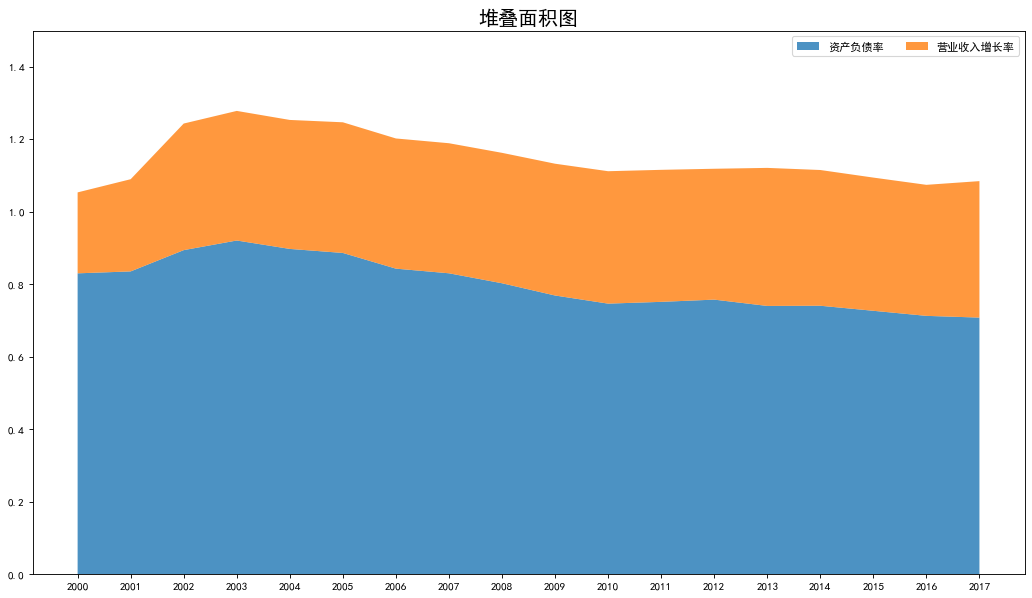

In [8]:
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80) #设置图片大小
columns = data.columns[2:] #提取第三列及之后的列名
labs = columns.values.tolist() #设置图片显示的标签

ax = plt.gca()
ax.stackplot(x, y, labels=labs,alpha=0.8)

#图片标题
ax.set_title('堆叠面积图', fontsize=18)

#设置坐标轴取值范围
ax.set(ylim=[0, 1.5])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0.2,0.4,0.6,0.8,1.0,1.2,1.4), fontsize=10)
plt.xlim(x[0], x[-1])
plt.show()

## 三、结果解释

从图中可以看出，该上市企业的·资产负债率·和·营业收入增长率·的变化趋势基本上一致。并且，·资产负债率·对应的面积更大（图中蓝色部分），即·资产负债率·的数值相对更大。